# **Project Name** - Hotel Booking Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**Muhammad Adnan

# **Project Summary -**

The hotel wants to understand more about how people book rooms and what influences their decisions. We have a big list of information about bookings, like when they were made, who the guests are, and if they were canceled. We want to figure out patterns and trends in this data to help the hotel make better decisions,improve their services and optimize their revenue. For example, we want to know when the best time to book a room is, what type of rooms guests prefer, and if certain factors increase the chances of a booking being canceled. The goal is to use this information to enhance the hotel's overall experience for guests and make smarter business decisions.

# **GitHub Link -**

# **Problem Statement**

The hotel wants to understand more about how people book rooms and what influences their decisions. We have a big list of information about bookings, like when they were made, who the guests are, and if they were canceled. We want to figure out patterns and trends in this data to help the hotel make better decisions and improve their services. For example, we want to know when the best time to book a room is, what type of rooms guests prefer, and if certain factors increase the chances of a booking being canceled. The goal is to use this information to enhance the hotel's overall experience for guests and make smarter business decisions.

#### **Define Your Business Objective?**

Our main goal is to enhance the hotel experience for guests and boost overall success. By analyzing how people book rooms and studying various factors like booking patterns, guest preferences, and cancellation trends, we aim to improve our services. The ultimate objective is to use this knowledge to make informed decisions that not only benefit our guests but also contribute to the hotel's overall growth and success in the hospitality industry.

# ***Let's Begin !***

## ***1. Know Your Data***


In [ ]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load the Hotel Booking dataset
data=pd.read_csv(r"/content/Hotel Bookings.csv")

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(119390, 32)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
data[data.duplicated()].shape

(31994, 32)

There are 31994 duplicate rows in the dataset. We will remove the dupliates by using the following Python code.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(87396, 32)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data[data.isnull()].shape[0]

87396

Every row contains atleast one NA.

company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

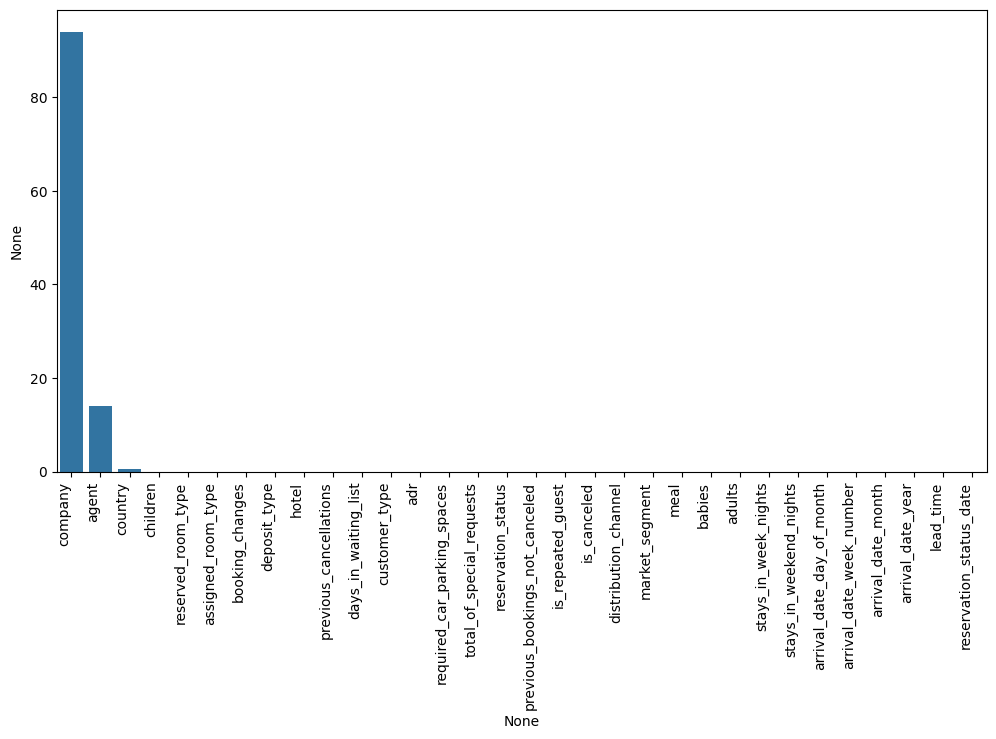

In [ ]:
# Visualizing the missing values
missing_percentage = (data.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percentage)
# Plot a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90, ha='right')
plt.show()

The chart reveals that the "company" feature has a very high percentage of missing values (93.98%), followed by "agent" with 13.95%. Other features like "country," "children," and "reservation_status_date" also have some missing values.

### What did you know about your dataset?
*   There are 119390 rows and 32 columns in the dataset
*   There are 31994 duplicate rows in the dataset.
*   Every row contains atleast one NA.
*   The "company" feature has a very high percentage of missing values (93.98%), followed by "agent" with 13.95%. Other features like "country," "children," and "reservation_status_date" also have some missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
print(data.describe(exclude=["O"]))   # We are excluding thpse faetures whose dtype is Object.

        is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
std        0.446466     86.052325           0.686102   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
std                   13.674572                   8.835146   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   

In [ ]:
# Check Unique Values for each variable.
class Get_Unique_Extractor:
  def __init__(self,data):
    self.data=data
    self.unique_values={}
  def get_unique_values(self):
    for column in data.columns:
      self.unique_values[column]=self.data[column].unique()
    return self.unique_values
get_value_ext=Get_Unique_Extractor(data)
unique_values_dict=get_value_ext.get_unique_values()


In [ ]:
for key,value in unique_values_dict.items():
  print(key,"--",value)
  print("*"*100)

hotel -- ['Resort Hotel' 'City Hotel']
****************************************************************************************************
is_canceled -- [0 1]
****************************************************************************************************
lead_time -- [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323

## 3. ***Data Wrangling***

### Data Wrangling Code

 #### Handle **Missing** Values:

In [ ]:
# Percentage of missing values in each feature
print(missing_percentage)

company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

As we can see there are four features company, agent, country and children which have missing values in them. We can handle each column one by one.


In [ ]:
"""First, let's address the 'company' column. Given that a significant portion of
   values in this column is missing, the exact reason remains unclear. One plausible
   explanation could be that individuals may not have utilized company-based booking
   services. Instead, they might have opted to directly approach hotels or communicated
   with them directly to secure a room reservation. Therefore we can drop the column from the dataset as
   it is not providing an information of paramount importance."""

data.drop(columns=["company"],inplace=True)



Let us have a look at "agent" column.

In [ ]:
# Percentage of missing values in agent column.
data.agent.isnull().mean()*100

13.951439425145315

In [ ]:
# Look at value counts
pd.DataFrame(data.agent.value_counts())

,agent
9.0,28759
240.0,13028
14.0,3349
7.0,3300
250.0,2779
...,...
497.0,1
337.0,1
510.0,1
165.0,1


As we can see that the agent with ID 9 has done most of the bookings, we can replace the missing places with this ID.

In [ ]:
# Impute missing values in the 'agent' column using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
data['agent'] = imputer.fit_transform(data[['agent']])

Let us look at the 'children' column

In [ ]:
# Value counts of children column
data.children.value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [ ]:
# Missing values in column 'children'
data.children.isnull().mean()*100

0.004576868506567806

Considering the extremely low percentage of missing values in the 'children' column, we have two viable options for handling them. We can either opt to remove the rows containing missing values or replace the missing values with the mode of the same column.


In [ ]:
# Replace null values in children column with the most frequent one
data['children'] = imputer.fit_transform(data[['children']])

Now let us come for the 'country' column

In [ ]:
data["country"]=imputer.fit_transform(data[["country"]])

Let's check if there are any rows where the counts of adults, children, and babies are all zero.


In [ ]:
data[(data['adults']==0) & (data ['children']==0) & (data['babies']==0)].shape

(166, 31)

It's possible that these rows contain data entry errors or missing . We need to remove them.

In [ ]:
data.drop(data[(data['adults'] == 0) & (data['children'] == 0) & (data['babies'] == 0)].index, inplace=True)


### Converting columns into appropirate data types

We will convert columns **adults**, **children** and **babies** into **int** data type as they are in **float**.

In [ ]:
data[["adults","children","babies"]]=data[["adults","children","babies"]].astype(int)

Now we will convert **reservation_status_date** into **date_time** data type as it is in **object**.

In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

### Adding Important columns and creating new columns

We will add the values of **stays_in_weekend_nights** and **stays_in_week_nights**. Adding theses column  can provide insights into the total length of stay for each booking.

In [ ]:
data["total_stay"]=data.stays_in_weekend_nights+data.stays_in_week_nights

Similarly, adding the counts of **adults**, **children**, and **babies** can give you the total number of guests.

In [ ]:
data["total_guests"]=data.adults+data.children+data.babies

We can create a new column of arrival by combining 'arrival_date_day_of_month', 'arrival_date_month' and
'arrival_date_year'.

In [ ]:
#convert month name to number then create new arrival date column by combining year month date
data['arrival_date_month'] = pd.to_datetime(data['arrival_date_month'] , format='%B').dt.month
data['arrival_date'] = pd.to_datetime(dict(year=data.arrival_date_year, month=data.arrival_date_month, day=data.arrival_date_day_of_month))

### Convert columns values

We can see some confusing values like TA/TO and BB, FB, HB, we will replaced it so it will be easier for us to conduct further analysis.
Here are the meaning of each term:
- TA/TO : Travel Agents/Tour Operators
- GDS : Global Distribution System
- SC : Self-catering, which means no meals are included, but the accommodation may have facilities for cooking light meals
- BB: Bed and breakfast, which includes breakfast
- HB: Half board, which includes breakfast and dinner, but no evening drinks
- FB: Full board, which includes breakfast, lunch, and dinner, but no evening drinks

In [ ]:
data['distribution_channel'].value_counts()

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

As we can see TA/TO is the most frequent value in distribution_channel,
therefore, we will underfined by TA/TO in the same column.

In [ ]:
#replace TA/TO with Undefined in distribution_channel column
data["distribution_channel"].replace("Undefined","TA/TO",inplace=True)

Similarly we will deal with 'meal' column.

In [ ]:
#replace Undefined, BB, FB, HB, SC to its meaning.
data["meal"].value_counts()

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

In [ ]:
#replace Undefined by the most frequent value among BB, FB, HB and SC and also replace BB, FB, HB and SC by thier meanings.
data['meal'].replace( "Undefined", "BB",inplace = True)
data.replace(["BB", "FB", "HB", "SC"],["Breakfast","Half Board","Full Board","self Catering"],inplace=True)

In [ ]:
data.meal.value_counts()

Breakfast        68399
self Catering     9391
Full Board        9080
Half Board         360
Name: meal, dtype: int64

In [ ]:
# Replace undefined values in 'market_segment' column by the most frequent value
data["market_segment"].replace("Undefined",data.market_segment.value_counts().idxmax(),inplace=True)

**Data Wrangling Summary:**

#### 1. Handling Missing Values:
   - Dropped 'company' column due to significant missing values.
   - Imputed missing values in 'agent', 'children', and 'country.'

#### 2. Handling Zero Guest Entries:
   - Removed rows with zero adults, children, and babies.

#### 3. Data Type Conversion:
   - Converted 'adults', 'children', and 'babies' to integers.
   - Converted 'reservation_status_date' to datetime.

#### 4. Feature Engineering:
   - Created 'total_stay' and 'total_guests' features.

#### 5. Handling Distribution Channel:
   - Imputed missing values in 'distribution_channel.'

#### 6. Handling Meal Column:
   - Standardized 'meal' column values.

#### 7. Date Transformation:
   - Converted month names to numbers.
   - Created 'arrival_date' from year, month, and day.

**Insights:**
- 'Company' column lacked crucial data, likely indicating low usage.
- Identified and removed incomplete bookings with zero guests.
- Introduced new features for stay duration and total guests.
- Standardized and clarified 'meal' column values.
- Enhanced date handling for better analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

We can start this section by looking at the correlation heatmap between the numerical variables.

In [ ]:
# Let us gather all the numeric variables
numeric_columns=[]
for col in data.columns:
  if data[col].dtype=="int" or data[col].dtype=="float" :
    numeric_columns.append(col)
print(numeric_columns)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stay', 'total_guests']


<Axes: >

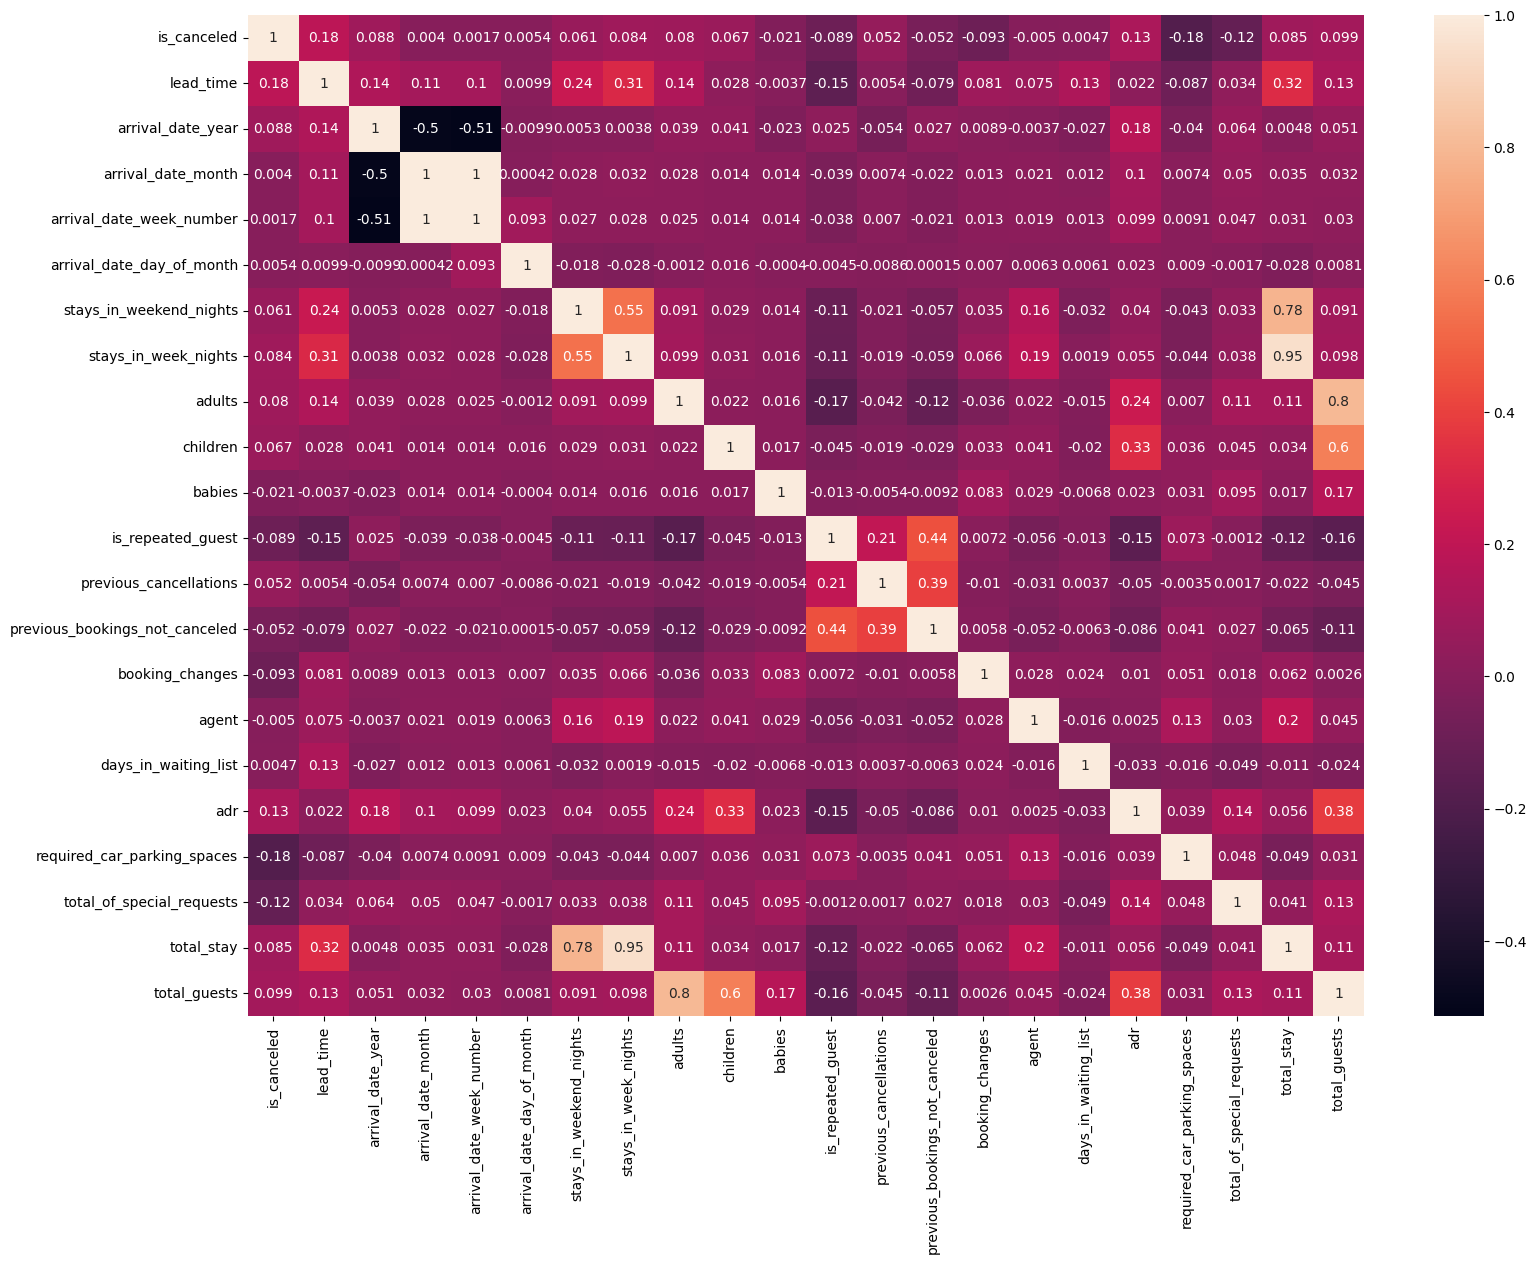

In [ ]:
# Let us explore the heatmap of the numeric variables
corr_matrix=data[numeric_columns].corr()
plt.figure(figsize=(18,13))
sns.heatmap(corr_matrix,annot=True)


We will examine all possible combinations of numerical columns to uncover interesting insights. To streamline our focus, we have set a correlation threshold of 0.30. In other words, we will only consider features with a correlation exceeding 0.30 for further analysis.

In [ ]:
for col1 in numeric_columns:
  for col2 in numeric_columns:
    if col1!=col2:
      correlation=data[[col1,col2]].corr().iloc[0,1]
      if correlation>=0.30:
        print(f"Correlation between {col1} and {col2} is {correlation}")


Correlation between lead_time and stays_in_week_nights is 0.31250566938842533
Correlation between lead_time and total_stay is 0.3209143800138595
Correlation between arrival_date_month and arrival_date_week_number is 0.9950791309941334
Correlation between arrival_date_week_number and arrival_date_month is 0.9950791309941334
Correlation between stays_in_weekend_nights and stays_in_week_nights is 0.5504710533520134
Correlation between stays_in_weekend_nights and total_stay is 0.7839288439674248
Correlation between stays_in_week_nights and lead_time is 0.31250566938842533
Correlation between stays_in_week_nights and stays_in_weekend_nights is 0.5504710533520135
Correlation between stays_in_week_nights and total_stay is 0.9498499660545953
Correlation between adults and total_guests is 0.8019908507635705
Correlation between children and adr is 0.3263592992382684
Correlation between children and total_guests is 0.5973921869376874
Correlation between is_repeated_guest and previous_bookings_not

**Insights**
- The correlation between "total_stay" and "stays_in_weekend_nights" is 0.78 while the correlation between "total_stay" and "stays_in_week_nights" is 0.95. The higher correlation of 0.95 between 'total_stay' and 'stays_in_week_nights' suggests stronger positive relationship. This indicates that the majority of the total stay duration is contributed by the number of nights booked on weekdays.

- The number of 'adults' is highly correlated with 'total_guests', indicating that the majority of guests are adults.

- The variables 'total_guests' and 'adr' are slighly positively correlated. More guests often lead to higher room rates (ADR) due to larger room types or added amenities. This positive correlation highlights how adjusting room configurations and pricing strategies for larger groups can boost revenue per room night, positively impacting overall ADR.

Let us move forward towards **Univariate Analysis** and answer some of the revelant questions.

## Question-1 : What is the distribution of lead time?

<Axes: xlabel='lead_time', ylabel='Density'>

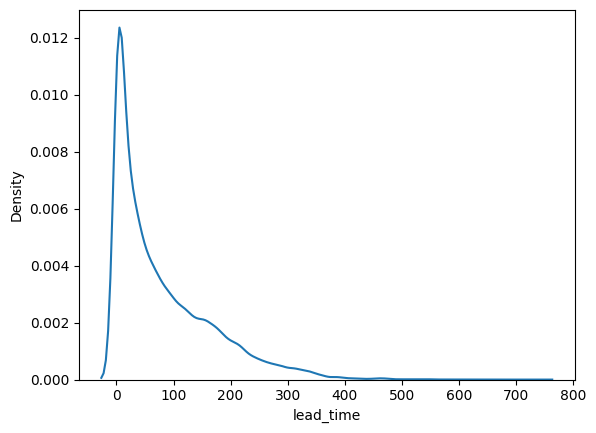

In [ ]:
sns.kdeplot(data.lead_time)

**Conclusion**
- A right-skewed distribution for lead_time means that most guests tend to make their hotel reservations on short notice. In simpler terms, many people are booking hotels at the last minute, suggesting a trend of spontaneous or impromptu travel plans.

## Question-2:What is the most common country of origin for guests?

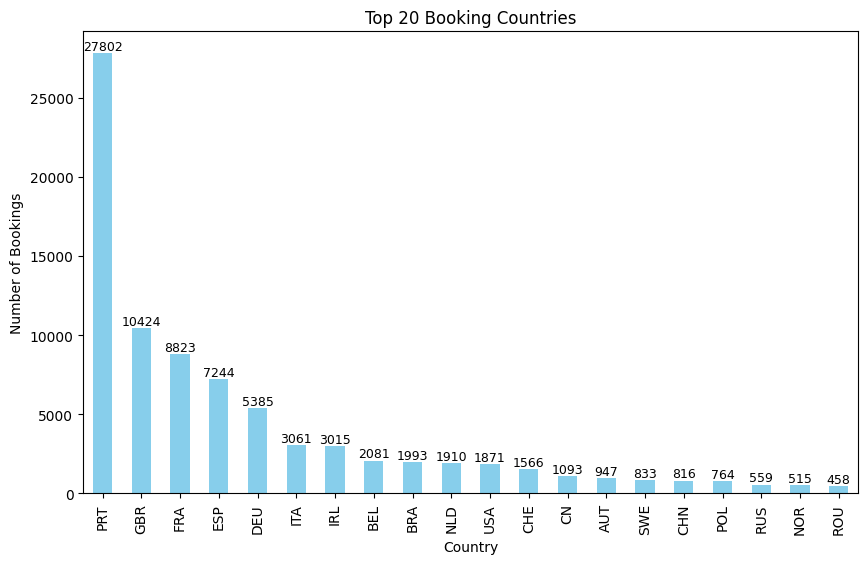

In [ ]:
# Plotting the bar plot
top_countries = data["country"].value_counts()[:20]
ax = top_countries.plot(kind="bar", figsize=(10, 6), color='skyblue')

# Adding the number values above each bar
for i, count in enumerate(top_countries):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.title("Top 20 Booking Countries")

# Display the plot
plt.show()

- Most of the guest are coming from PRT( Portugal) followed by GBR ( Great Britain) and other western countries.



## Question-3 : What is the most common distribution channel for bookings?

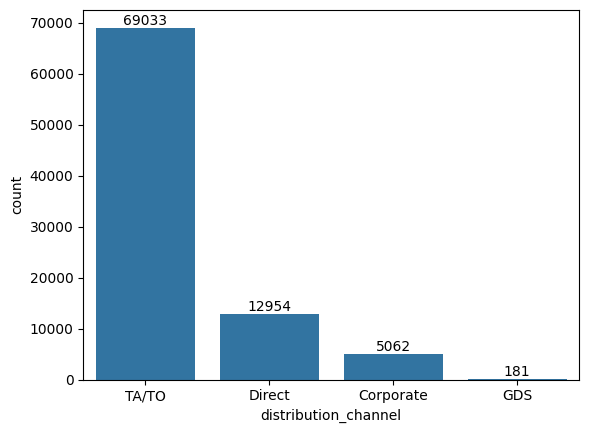

In [ ]:
distribution_channel_value_counts=data["distribution_channel"].value_counts()
sns.countplot(x=data["distribution_channel"],order=distribution_channel_value_counts.index)
for i,m in enumerate(distribution_channel_value_counts):
  plt.text(i,m+0.1,str(m),va="bottom",ha="center")


As revealed by the above chart, the most common distribution channel is TA/TO.

## Question-4 : What is the distribution of 'total_of_special_requests'?



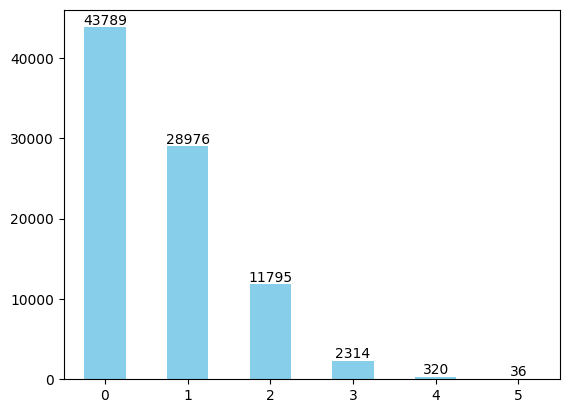

In [ ]:
#sns.countplot(data["total_of_special_requests"])
data["total_of_special_requests"].value_counts().plot(kind="bar",color="skyblue")
for index,value in enumerate(data["total_of_special_requests"].value_counts()):
  plt.text(index,value,str(value),ha="center",va="bottom")
plt.xticks(rotation=0)
plt.show()

The distribution indicates that a large portion of guests either do not make any special requests or make only one,suggesting that most guests have relatively simple or standard requirements.

## Question-5 : What is the distribution of customer types in hotel bookings?

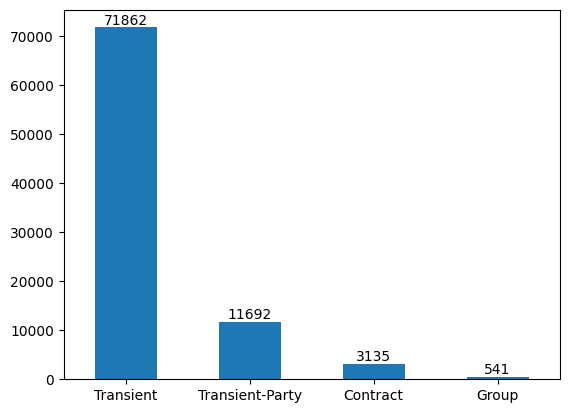

In [ ]:
data["customer_type"].value_counts().plot(kind="bar")
for index,value in enumerate(data["customer_type"].value_counts()):
  plt.text(index,value,str(value),ha="center",va="bottom")
plt.xticks(rotation=0)
plt.show()

**Insights:**

- The hotel primarily attracts individual transient guests.
- Transient-Party bookings, while fewer than Transient, still contribute a significant portion of reservations.
-Contract and Group bookings represent a smaller proportion, indicating a focus on individual and smaller group reservations.

## Question-6 : How long do people stay at the hotels?

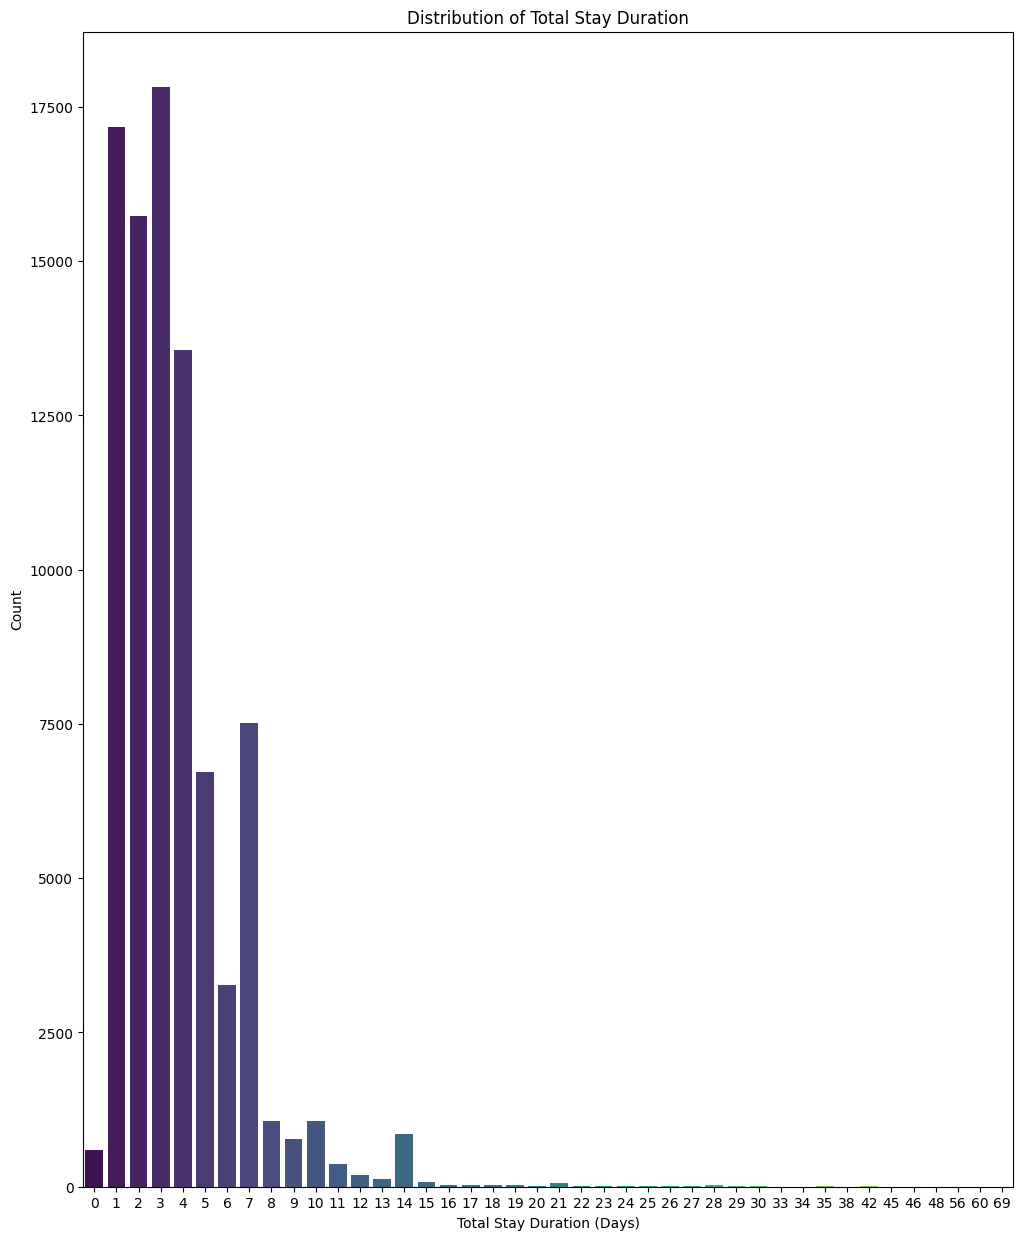

In [ ]:
plt.figure(figsize=(12, 15))
sns.countplot(x=data.total_stay, palette='viridis')
plt.title('Distribution of Total Stay Duration')
plt.xlabel('Total Stay Duration (Days)')
plt.ylabel('Count')
plt.show()

**Insights**
- Most guests prefer a 3-day stay, followed by popular durations of 1, 2, and 4 days. Longer stays, like 60 or 69 days, are less common in the dataset.

## Question-7 : Are hotel bookings more frequent on weekdays or weekends?

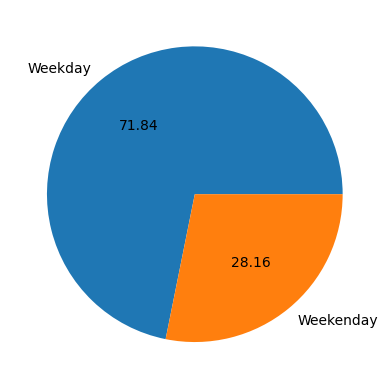

In [ ]:
data["arrival_day_name"]=data.arrival_date.dt.day_name()
data['weekday_or_weekend']=data.arrival_date.dt.dayofweek.replace(to_replace=[0,1,2,3,4,5,6],value=["Weekday","Weekday","Weekday","Weekday","Weekday","Weekenday","Weekenday"])
plt.pie(x=data['weekday_or_weekend'].value_counts(),labels=data['weekday_or_weekend'].value_counts().index,autopct="%0.2f")
plt.show()

- Approximately 72% of the bookings occur on weekdays, while the remaining 28% take place on weekends.

## Question-8 : What is the distribution of guest arrivals across different months? Which month tends to attract the highest number of guests?

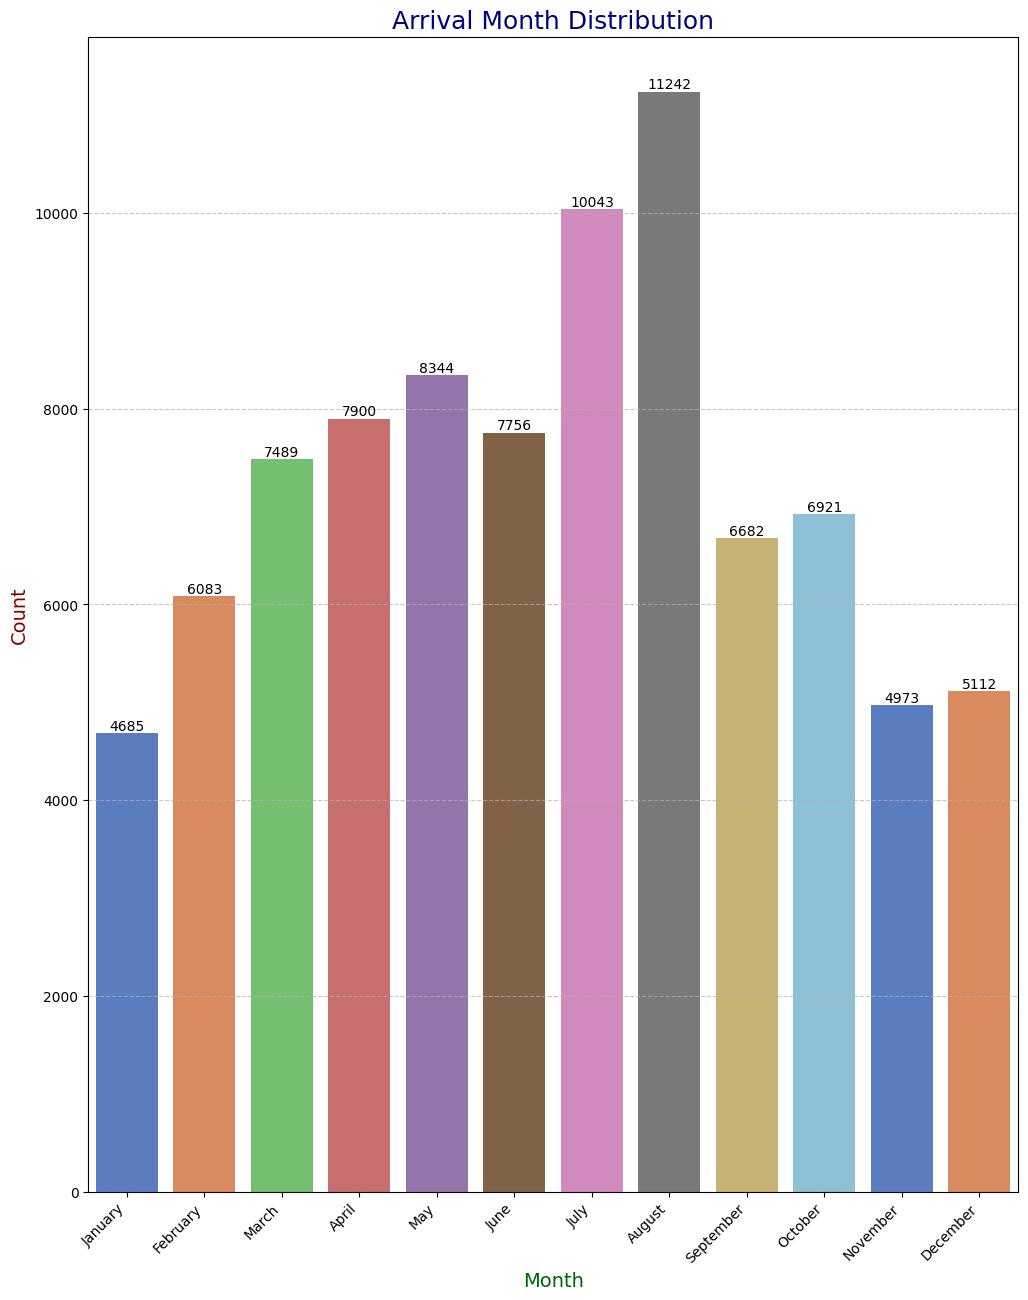

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define vibrant colors
colors = sns.color_palette('muted')

# Create a figure with larger dimensions
plt.figure(figsize=(12, 15))

# Define the order of months
months_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Replace numeric month values with month names
data["arrival_month"] = data.arrival_date_month.replace(to_replace=range(1, 13, 1), value=months_list)

# Create a count plot with vibrant colors and ordered months
pt=sns.countplot(x=data.arrival_month, data=data, order=months_list, palette=colors)

# Add a title and labels
plt.title('Arrival Month Distribution', fontsize=18, color='navy')
plt.xlabel('Month', fontsize=14, color='darkgreen')
plt.ylabel('Count', fontsize=14, color='darkred')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add data labels on the bars
for p in pt.patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():0.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**Insights**
- The most common month for guest arrivals is August , with 11,242 occurrences.
- July is the second most common month, with 10,043 occurrences.

## Question-9 : Are there certain room types that are consistently preferred or requested by guests?

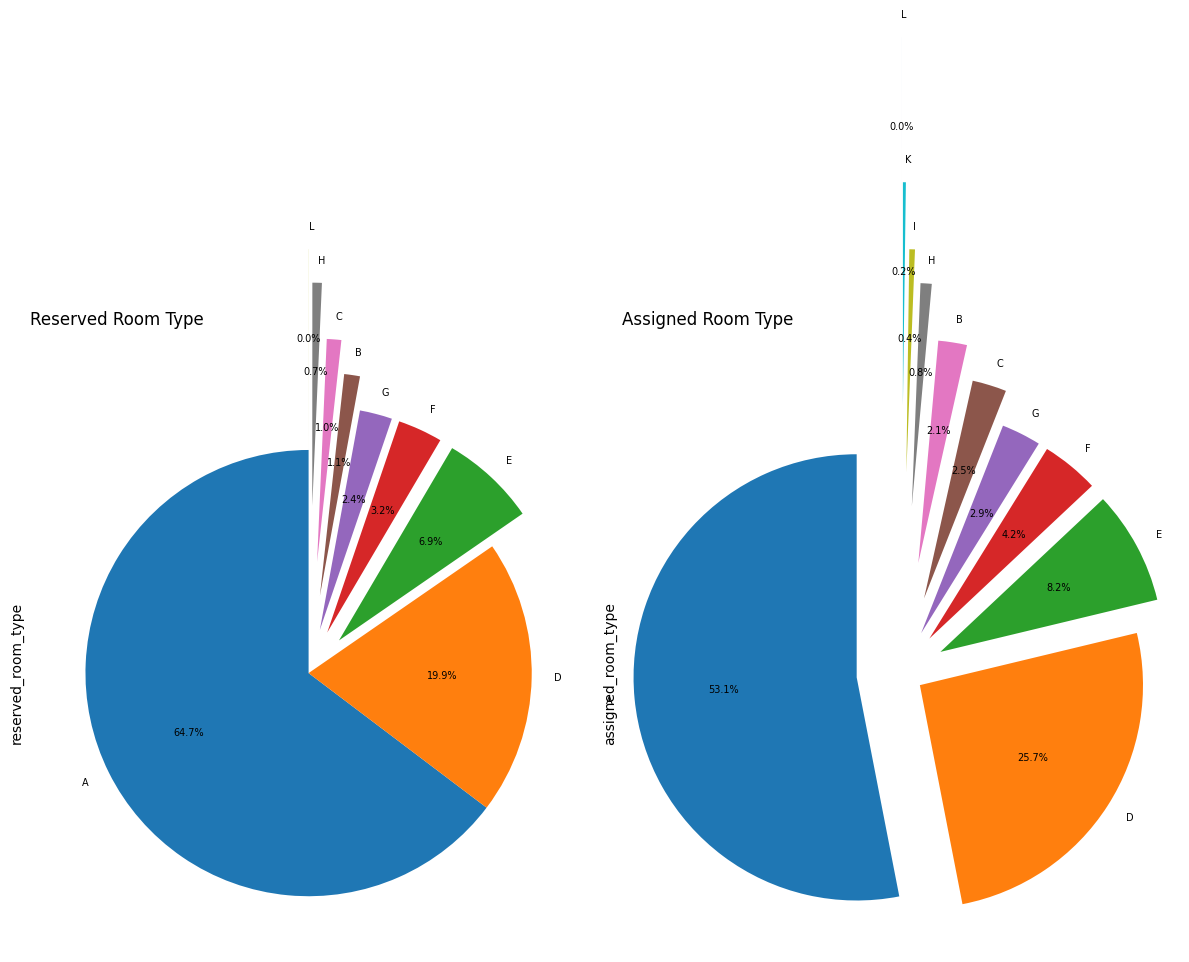

In [251]:
import matplotlib.pyplot as plt

# Create a figure with a larger size
plt.figure(figsize=(12, 15))

# Plotting reserved room type pie chart
plt.subplot(1, 2, 1)  # Subplot for the first pie chart
data['reserved_room_type'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0,0.2,0.2,0.2,0.35,0.5,0.75,0.9], startangle=90, fontsize=7)
plt.title('Reserved Room Type',loc="left",pad=50)

# Plotting assigned room type pie chart
plt.subplot(1, 2, 2)  # Subplot for the second pie chart
data['assigned_room_type'].value_counts().plot.pie(autopct='%1.1f%%',explode= [0.2,0.1,0.2,0.2,0.2,0.35,0.5,0.75,0.9,1.2,1.85],startangle=90, fontsize=7)
plt.title('Assigned Room Type', loc='left', pad=50)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [256]:
data[["reserved_room_type"]].value_counts()/len(data[["reserved_room_type"]])*100

reserved_room_type
A                     64.697925
D                     19.919752
E                      6.919638
F                      3.232833
G                      2.350109
B                      1.141809
C                      1.047805
H                      0.683251
L                      0.006878
dtype: float64

## Question - 10 : What are the probabilities of guests obtaining specific room types when making reservations?
## Or
## Which room type has the highest probability of being assigned to guests?

In [265]:
for i in ["A","B","C","D","E","F","G","H","I","K","L"]:
  prob=(data[data["assigned_room_type"]==f"{i}"].assigned_room_type==data[data["assigned_room_type"]==f"{i}"].reserved_room_type).mean()
  print(f"Probability of room type {i} being assigned is : {prob : 0.2f}")

Probability of room type A being assigned is :  0.99
Probability of room type B being assigned is :  0.48
Probability of room type C being assigned is :  0.40
Probability of room type D being assigned is :  0.71
Probability of room type E being assigned is :  0.76
Probability of room type F being assigned is :  0.73
Probability of room type G being assigned is :  0.80
Probability of room type H being assigned is :  0.82
Probability of room type I being assigned is :  0.00
Probability of room type K being assigned is :  0.00
Probability of room type L being assigned is :  1.00


**Insights**
- The probability of room type A being assigned to guests is the highest.

Now we will head towards **Bivariate Analysis**.

## Question-1 : Is there a difference in cancellation rates between resort and city hotels?

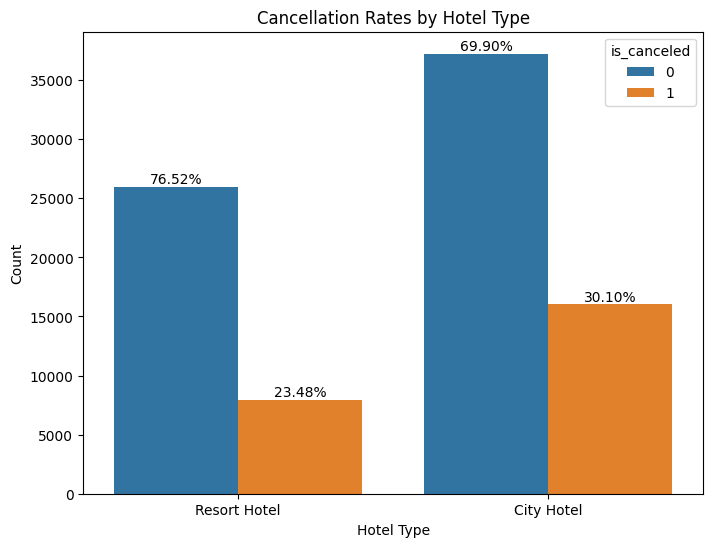

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='hotel', hue='is_canceled', data=data)

# Calculate cancellation and non-cancellation percentages for resort and city hotels
resort_cancel_percentage = data[data['hotel'] == 'Resort Hotel']['is_canceled'].mean()
resort_non_cancel_percentage = 1 - resort_cancel_percentage

city_cancel_percentage = data[data['hotel'] == 'City Hotel']['is_canceled'].mean()
city_non_cancel_percentage = 1 - city_cancel_percentage
l=[]
for p in ax.patches:
  y=p.get_x()+p.get_width()/2
  if y!=0:
    l.append(float(y))
l.sort()

# Add cancellation percentages over the bars for resort hotel
ax.text(l[0], data[data['hotel'] == 'Resort Hotel']['is_canceled'].value_counts()[0],
        f'{resort_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[1], data[data['hotel'] == 'Resort Hotel']['is_canceled'].value_counts()[1],
        f'{resort_cancel_percentage:.2%}',
        ha="center", va="bottom")

# Add cancellation percentages over the bars for city hotel
ax.text(l[2], data[data['hotel'] == 'City Hotel']['is_canceled'].value_counts()[0],
        f'{city_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[3], data[data['hotel'] == 'City Hotel']['is_canceled'].value_counts()[1],
        f'{city_cancel_percentage:.2%}',
        ha="center", va="bottom")

# Add labels and title for better interpretation
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.title('Cancellation Rates by Hotel Type')
# Show the plot
plt.show()

**Insights**
- Cacellation rate is more in City Hotels than in Resort Hotels,that is,city hotels are more prone to cancellation.

## Question-2 : Which market segment has the highest repeated guest rate?

The market segment with the highest repeated guest rate is: Corporate


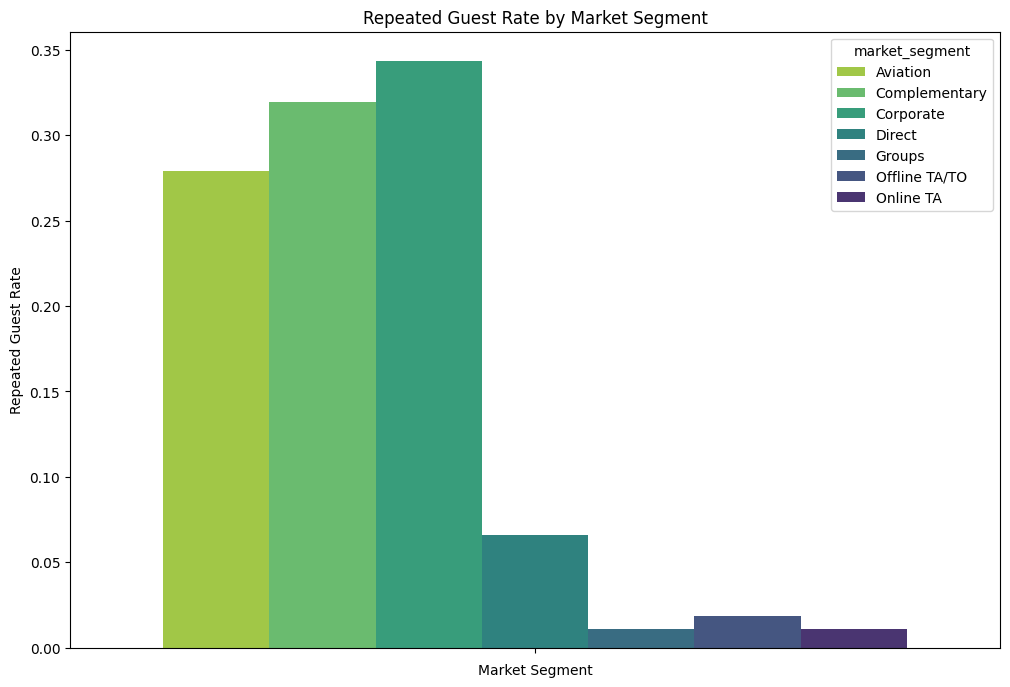

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame

# Calculate Repeated Guest Rate
repeated_guest_rate = data.groupby('market_segment')['is_repeated_guest'].mean()

# Calculate Stay Duration
stay_duration = data.groupby('market_segment')['total_stay'].mean()

# Identify the highest rates
highest_repeated_guest_rate_segment = repeated_guest_rate.idxmax()
highest_stay_duration_segment = stay_duration.idxmax()

# Print the results
print(f"The market segment with the highest repeated guest rate is: {highest_repeated_guest_rate_segment}")

# Visualization (optional)
plt.figure(figsize=(12, 8))
sns.barplot(hue=repeated_guest_rate.index, y=repeated_guest_rate.values,palette="viridis_r")
plt.xlabel('Market Segment')
plt.ylabel('Repeated Guest Rate')
plt.title('Repeated Guest Rate by Market Segment')
plt.show()

The market segment "Corporate" has the highest rate of repeated guests. This implies that a significant portion of guests whose bookings are made by corporate entities tends to return to the hotel for subsequent stays.

## Question- 3: Which market segment has the highest average stay duration?

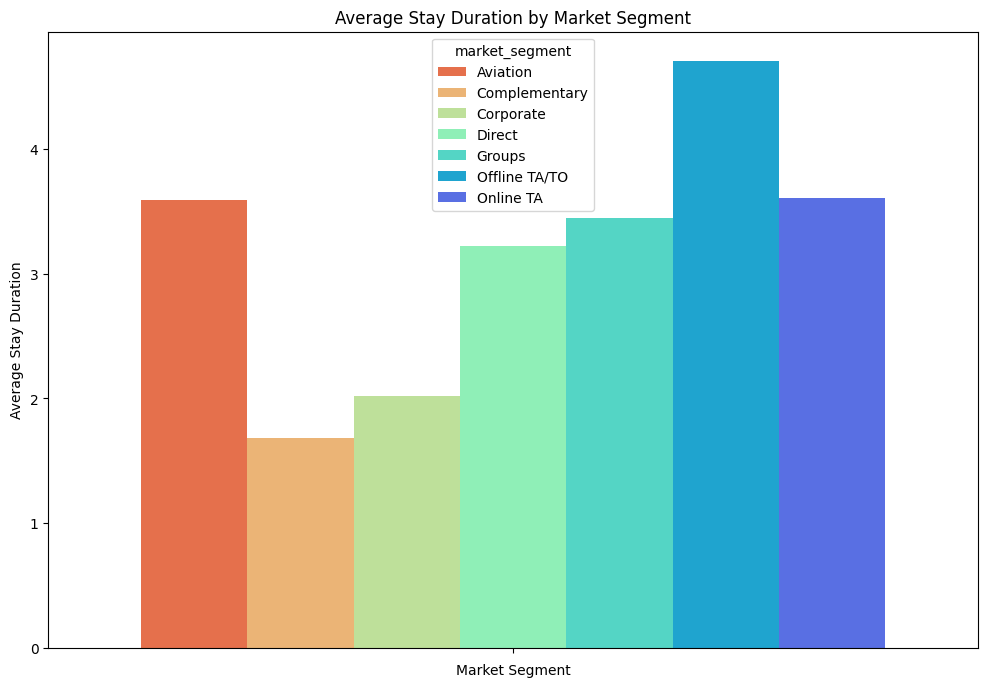

The market segment with the highest stay duration is: Offline TA/TO


In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(hue=stay_duration.index, y=stay_duration.values,palette="rainbow_r")
plt.xlabel('Market Segment')
plt.ylabel('Average Stay Duration')
plt.title('Average Stay Duration by Market Segment')
plt.show()

print(f"The market segment with the highest stay duration is: {highest_stay_duration_segment}")

## Question-4 : How do different room types influence the total number of special requests made by customers?

#### Bivariate

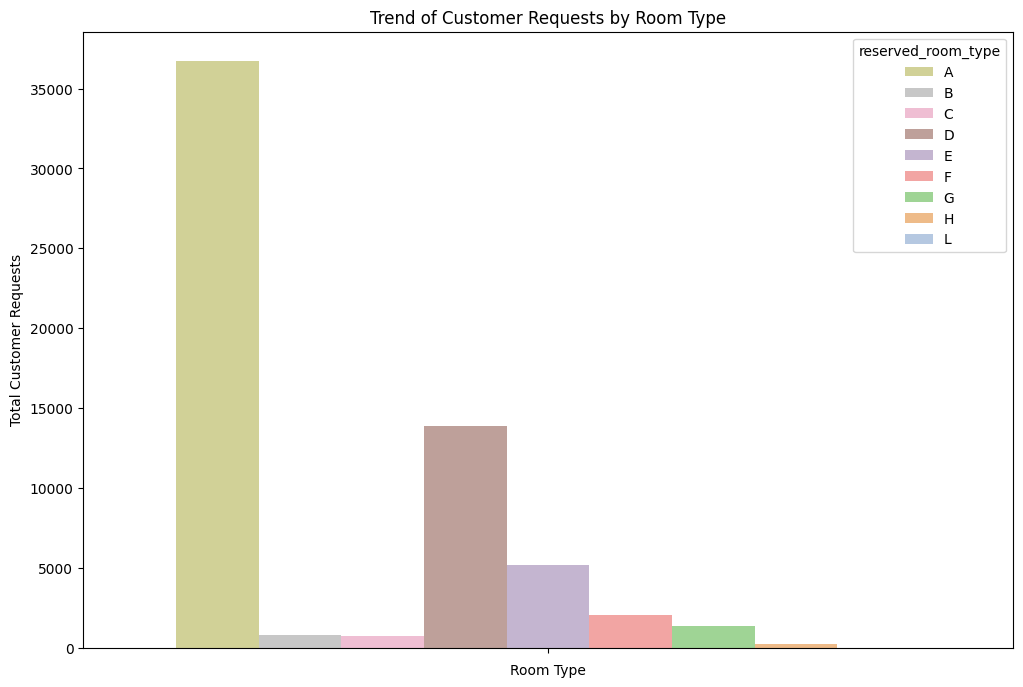

In [ ]:
# Data Preparation
room_type_requests = data.groupby(['reserved_room_type'])['total_of_special_requests'].sum()

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(hue=room_type_requests.index, y=room_type_requests.values,palette="tab20_r")
plt.xlabel('Room Type')
plt.ylabel('Total Customer Requests')
plt.title('Trend of Customer Requests by Room Type')
plt.show()

**Insights**
- Room type A has the highest number of special requsts followed by room type D. We can assume that they are more popular rooms leading to the higher demand for requests.

## Question-5 :	Create a box plot to compare lead times across different hotel types

#### Bivariate

<Axes: xlabel='lead_time', ylabel='Density'>

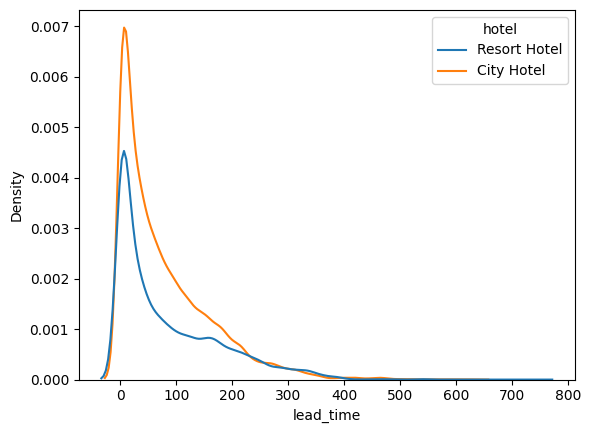

In [ ]:
sns.kdeplot(x="lead_time",hue="hotel",data=data)

**Insights**
- The majority of reservations exhibit shorter lead times, with a sharp peak at lower values.
- Similar to the Resort Hotel, the density is highest at shorter lead times, highlighting a significant number of last-minute bookings.

Now lets see which month results in high revenue.

## Question-6 : What is the distribution of Average Daily Rate (ADR) across months for all hotels?

#### Bivariate

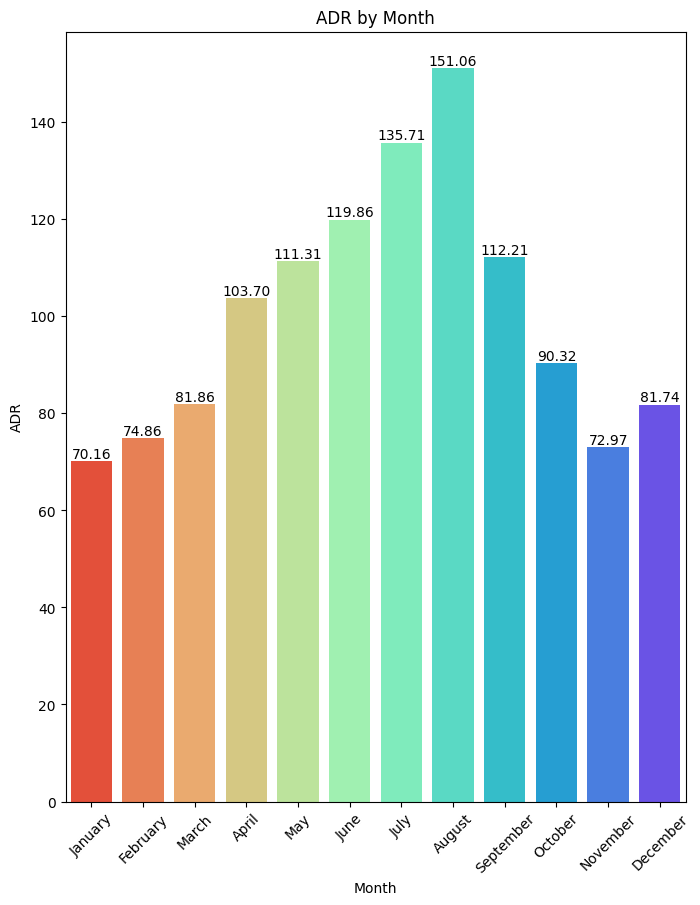

In [ ]:
plt.figure(figsize=(8,10))
adr_months=data.groupby(["arrival_month"])[["adr"]].mean()
ax=sns.barplot(x=adr_months.index, y='adr', data=adr_months, order=months_list,palette="rainbow_r")
for p in ax.patches:
  plt.text(p.get_x()+p.get_width()/2,p.get_height(),f"{p.get_height():0.2f}",ha="center", va="bottom")
# Adding labels and title
plt.xlabel('Month')
plt.ylabel('ADR')
plt.title('ADR by Month')
plt.xticks(rotation=45)
plt.show()


**Insights**
- August has the highest average daily room rate among all the months. This suggests that, on average, guests tend to pay more for hotel rooms in August compared to other months.

## Question-7 : How does the cancellation rate vary across different weeks of the year?

#### Bivariate


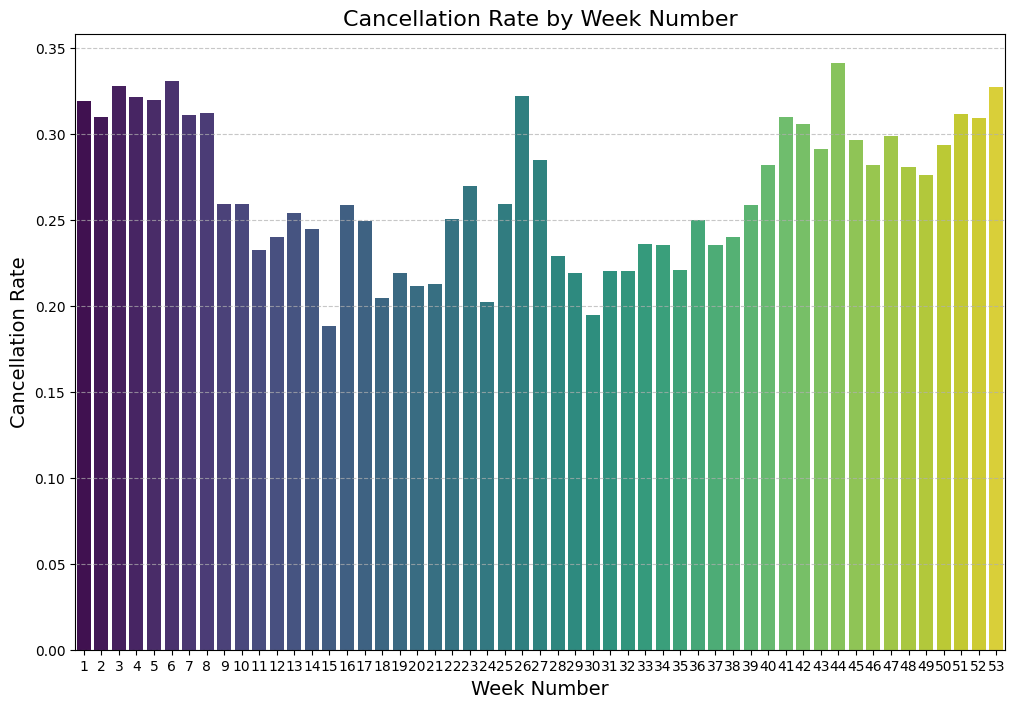

In [ ]:
plt.figure(figsize=(12, 8))

# Use a professional color palette
colors = sns.color_palette("viridis", n_colors=len(data["arrival_date_week_number"].unique()))

# Plotting the bar chart
ax = sns.barplot(x=data["arrival_date_week_number"].unique(), y=data.groupby(["arrival_date_week_number"])["is_canceled"].mean(), palette=colors)

# Adding grid lines
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding title and labels
plt.title('Cancellation Rate by Week Number', fontsize=16)
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)
plt.show()

**Insights**
- The bar chart reveals that the cancellation rate was highest during the 44th wee

## Question-8 : What is the average number of days guests spend on the waiting list for bookings, categorized by hotel type?


#### Bivariate

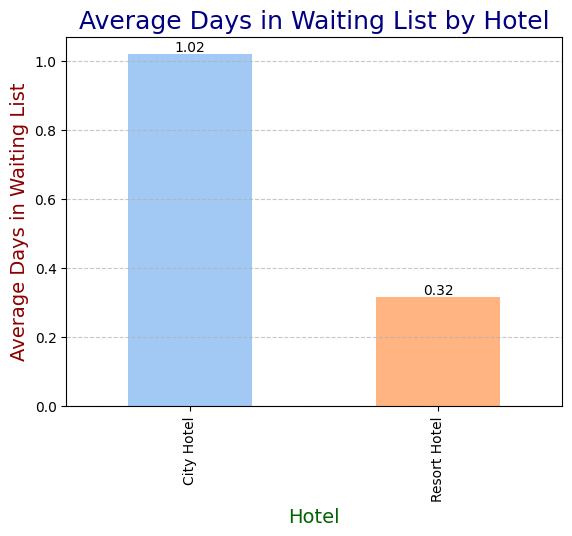

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define vibrant colors
colors = sns.color_palette('pastel')

# Group by hotel and calculate the mean of days in waiting list
waiting_list_means = data.groupby(data["hotel"])["days_in_waiting_list"].mean()

# Create a bar plot with vibrant colors
ax = waiting_list_means.plot(kind="bar", color=colors)

# Add a title and labels
plt.title('Average Days in Waiting List by Hotel', fontsize=18, color='navy')
plt.xlabel('Hotel', fontsize=14, color='darkgreen')
plt.ylabel('Average Days in Waiting List', fontsize=14, color='darkred')

# Add data labels on the bars
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

As we can see in city hotel guests have to wait to more.

## Question-9 : How does the cancellation rate vary between repeated and non-repeated guests?


#### Bivariate

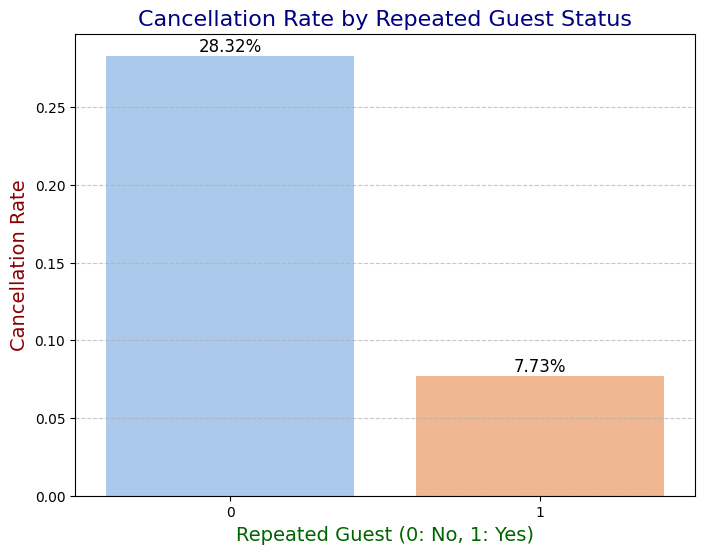

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate cancellation rates for repeated and non-repeated guests
cancellation_rates = data.groupby(['is_repeated_guest'])['is_canceled'].mean()

# Define vibrant colors
colors = sns.color_palette('pastel')

# Create a bar plot with vibrant colors
plt.figure(figsize=(8, 6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values, palette=colors)

# Add a title and labels
plt.title('Cancellation Rate by Repeated Guest Status', fontsize=16, color='navy')
plt.xlabel('Repeated Guest (0: No, 1: Yes)', fontsize=14, color='darkgreen')
plt.ylabel('Cancellation Rate', fontsize=14, color='darkred')

# Add data labels on the bars
for index, value in enumerate(cancellation_rates.values):
    plt.text(index, value, f'{value*100:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

**Insights**
- Reservations made by repeated guests (is_repeated_guest = 1) have a significantly lower cancellation rate (7.73%) compared to reservations made by non-repeated guests (is_repeated_guest = 0) with a higher cancellation rate (28.32%).
- This insight suggests that being a repeated guest is associated with a lower likelihood of cancellation.

## Question-10 : Can we identify any significant differences in the average number of previous bookings based on the repeated guest status?

#### Bivariate

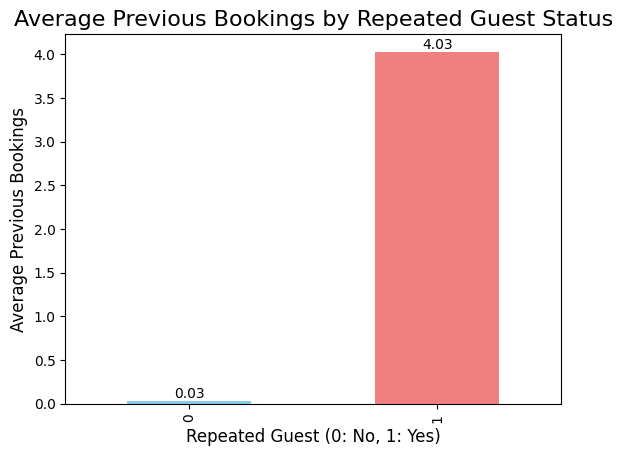

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by is_repeated_guest and calculate the mean of previous bookings
previous_bookings_means = data.groupby("is_repeated_guest")["previous_bookings_not_canceled"].mean()

# Create a grouped bar plot
ax = previous_bookings_means.plot(kind="bar", color=['skyblue', 'lightcoral'])

# Add title and labels
plt.title('Average Previous Bookings by Repeated Guest Status', fontsize=16)
plt.xlabel('Repeated Guest (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Average Previous Bookings', fontsize=12)

# Add data labels on the bars
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{p.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

**Insights**
- For guests who are not repeated guests (is_repeated_guest=0), the average number of previous bookings not canceled is approximately 0.03.

- For guests who are repeated guests (is_repeated_guest=1), the average number of previous bookings not canceled is approximately 4.03.

-  This suggests that, on average, repeated guests have a significantly higher number of previous bookings not canceled compared to non-repeated guests. The higher value for repeated guests implies they tend to have more history of bookings that were not canceled.

## Question-11 : How does the distribution of cancellation counts look across different deposit types?


#### Bivariate

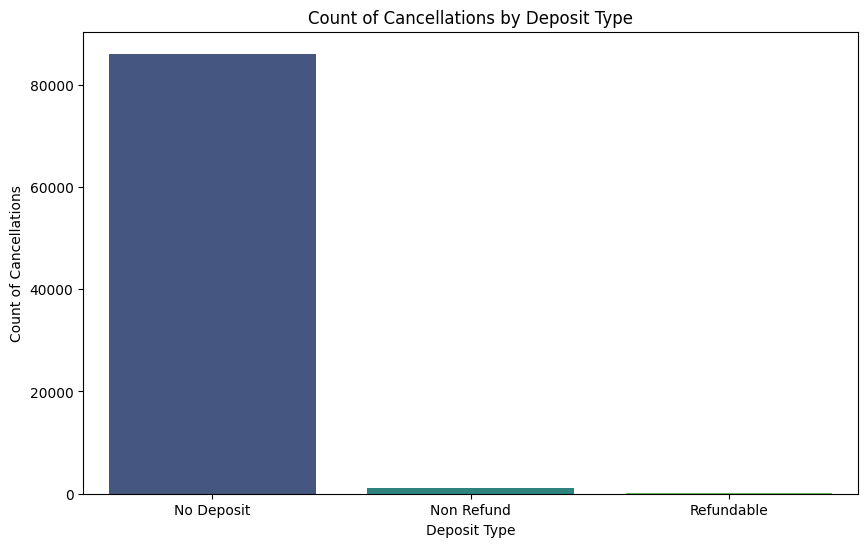

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data and getting the count of cancellations for each deposit type
deposit_cancel_counts = data.groupby("deposit_type")["is_canceled"].count().reset_index(name="count")

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="deposit_type", y="count", data=deposit_cancel_counts, palette="viridis")

# Adding labels and title
plt.xlabel("Deposit Type")
plt.ylabel("Count of Cancellations")
plt.title("Count of Cancellations by Deposit Type")

# Display the plot
plt.show()

**Insights**
- As anticipated, the majority of bookings fall under the category of "No Deposit," and unsurprisingly, most cancellations are associated with this booking type. However, it is notable and somewhat surprising that there are cancellations even for bookings with a "Non-Refundable" deposit, where guests typically do not receive a refund upon cancellation.

## Question-12 : How does the requirement for car parking space vary among guests?

In [ ]:
pd.crosstab(data["required_car_parking_spaces"], data["total_guests"])

total_guests,1,2,3,4,5,6,10,12,20,26,27,40,50,55
required_car_parking_spaces,,,,,,,,,,,,,,
0,14860,52393,9216,3321,117,1,2,2,2,5,2,1,1,1
1,1209,4643,857,545,19,0,0,0,0,0,0,0,0,0
2,2,17,5,4,0,0,0,0,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0,0,0,0,0
8,0,2,0,0,0,0,0,0,0,0,0,0,0,0


We observe instances where the recorded number of required car parking spaces exceeds the total number of guests, which appears unusual. To ensure data integrity, we will exclude these entries from our analysis. Additionally, for cases where the total number of guests exceeds 5, no car parking space is required, and we will exclude these entries from our further analysis as well.

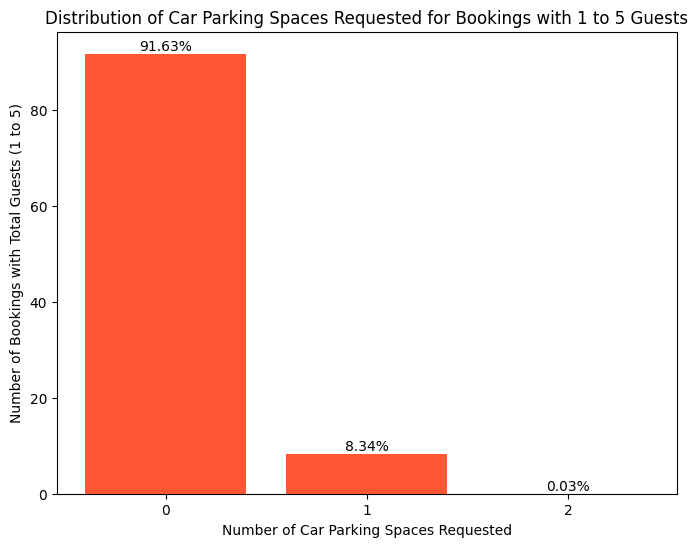

In [ ]:
result = pd.crosstab(data["required_car_parking_spaces"], data["total_guests"]).iloc[0:3:, 0:5].sum(axis="columns")

percentage_result = result.div(result.sum()) * 100

# Labels for each segment
labels = percentage_result.index.astype(str)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.bar(x=labels, height=percentage_result, color='#FF5733')

# Add a title
plt.xlabel("Number of Car Parking Spaces Requested")
plt.ylabel("Number of Bookings with Total Guests (1 to 5)")
plt.title("Distribution of Car Parking Spaces Requested for Bookings with 1 to 5 Guests")

j=0
for i in [0,1,2]:
  plt.text(i,percentage_result[j],f"{percentage_result[j]:0.2f}%",va="bottom",ha="center")
  j=j+1
# Show the plot
plt.show()

**Insights**
- The graph indicates that among guests with a total count ranging from 1 to 5, only 8.37% of them require car parking space.

## Question-13 : Is there a correlation between the number of booking changes, the deposit type being "No Deposit," and the cancellation rate?


#### Bivariate

In [ ]:
pd.crosstab(data["booking_changes"], data["deposit_type"])

deposit_type,No Deposit,Non Refund,Refundable
booking_changes,,,
0,70407,966,52
1,10774,60,34
2,3457,9,17
3,857,1,4
4,345,2,0
5,113,0,0
6,57,0,0
7,29,0,0
8,14,0,0


In [ ]:
prob=data[(data.booking_changes>4) & (data.deposit_type=="No Deposit") & (data.is_canceled==1)]["booking_changes"].shape[0]/(data[(data.booking_changes>4) & (data.deposit_type=="No Deposit") & (data.is_canceled==1)]["booking_changes"].shape[0]+data[(data.booking_changes>4) & (data.deposit_type=="No Deposit") & (data.is_canceled==0)]["booking_changes"].shape[0])

**Insights**
- Most bookings, irrespective of the number of changes, opt for "No Deposit," signifying a prevalent trend of not securing bookings with a deposit.

- With an increase in booking changes, "No Deposit" counts decline

- Bookings with higher changes often lack a deposit, suggesting a potential pattern where increased changes may indicate lower commitment without a secured deposit.
- Bookings with number of number of changes >4 and No Deposit are likely to be cenceled by 20%.
- Bookings with more than four changes and no deposit are associated with a 20% cancellation likelihood.

Let us go for Multivariate Analysis.

## Question-1 :	What is the relationship between market segment and cancellation?

#### Multiavariate

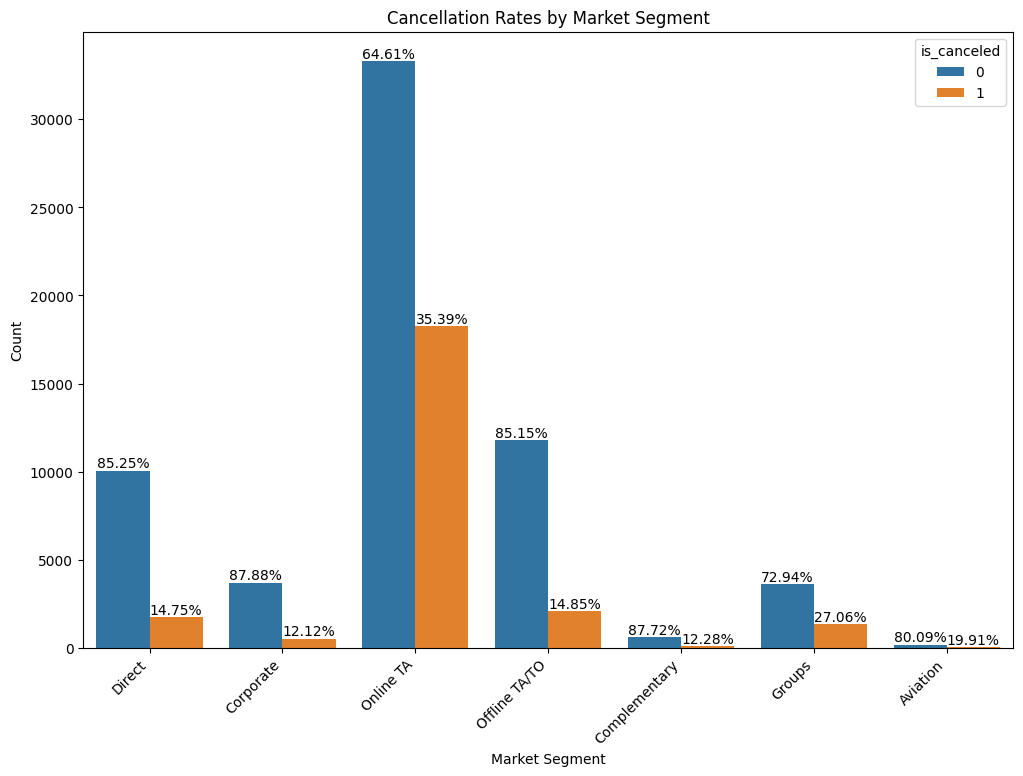

In [ ]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='market_segment', hue='is_canceled', data=data)

# Calculate cancellation and non-cancellation percentages for each market segment
Online_TA_cancel_percentage = data[data['market_segment'] == 'Online TA']['is_canceled'].mean()
Online_TA_non_cancel_percentage = 1 - Online_TA_cancel_percentage

Offline_TA_TO_cancel_percentage = data[data['market_segment'] == 'Offline TA/TO']['is_canceled'].mean()
Offline_TA_TO_non_cancel_percentage = 1 - Offline_TA_TO_cancel_percentage

Offline_TA_TO_cancel_percentage = data[data['market_segment'] == 'Offline TA/TO']['is_canceled'].mean()
Offline_TA_TO_non_cancel_percentage = 1 - Offline_TA_TO_cancel_percentage

Direct_cancel_percentage = data[data['market_segment'] == 'Direct']['is_canceled'].mean()
Direct_non_cancel_percentage = 1 - Direct_cancel_percentage

Groups_cancel_percentage = data[data['market_segment'] == 'Groups']['is_canceled'].mean()
Groups_non_cancel_percentage = 1 - Groups_cancel_percentage

Corporate_cancel_percentage = data[data['market_segment'] == 'Corporate']['is_canceled'].mean()
Corporate_non_cancel_percentage = 1 - Corporate_cancel_percentage

Complementary_cancel_percentage = data[data['market_segment'] == 'Complementary']['is_canceled'].mean()
Complementary_non_cancel_percentage = 1 - Complementary_cancel_percentage

Aviation_cancel_percentage = data[data['market_segment'] == 'Aviation']['is_canceled'].mean()
Aviation_non_cancel_percentage = 1 - Aviation_cancel_percentage
l=[]
for p in ax.patches:
  y=p.get_x()+p.get_width()/2
  if y!=0:
    l.append(float(y))
l.sort()

# Add cancellation percentages over the bars for each market segment
ax.text(l[0], data[data['market_segment'] == 'Direct']['is_canceled'].value_counts()[0],
        f'{Direct_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[1], data[data['market_segment'] == 'Direct']['is_canceled'].value_counts()[1],
        f'{Direct_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[2], data[data['market_segment'] == 'Corporate']['is_canceled'].value_counts()[0],
        f'{Corporate_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[3], data[data['market_segment'] == 'Corporate']['is_canceled'].value_counts()[1],
        f'{Corporate_cancel_percentage:.2%}',
        ha="center", va="bottom")
ax.text(l[4], data[data['market_segment'] == 'Online TA']['is_canceled'].value_counts()[0],
        f'{Online_TA_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[5], data[data['market_segment'] == 'Online TA']['is_canceled'].value_counts()[1],
        f'{Online_TA_cancel_percentage:.2%}',
        ha="center", va="bottom")
ax.text(l[6], data[data['market_segment'] == 'Offline TA/TO']['is_canceled'].value_counts()[0],
        f'{Offline_TA_TO_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[7], data[data['market_segment'] == 'Offline TA/TO']['is_canceled'].value_counts()[1],
        f'{Offline_TA_TO_cancel_percentage:.2%}',
        ha="center", va="bottom")
ax.text(l[8], data[data['market_segment'] == 'Complementary']['is_canceled'].value_counts()[0],
        f'{Complementary_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[9], data[data['market_segment'] == 'Complementary']['is_canceled'].value_counts()[1],
        f'{Complementary_cancel_percentage:.2%}',
        ha="center", va="bottom")
ax.text(l[10], data[data['market_segment'] == 'Groups']['is_canceled'].value_counts()[0],
        f'{Groups_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[11], data[data['market_segment'] == 'Groups']['is_canceled'].value_counts()[1],
        f'{Groups_cancel_percentage:.2%}',
        ha="center", va="bottom")
ax.text(l[12], data[data['market_segment'] == 'Aviation']['is_canceled'].value_counts()[0],
        f'{Aviation_non_cancel_percentage:.2%}',
        ha="center", va="bottom")

ax.text(l[13], data[data['market_segment'] == 'Aviation']['is_canceled'].value_counts()[1],
        f'{Aviation_cancel_percentage:.2%}',
        ha="center", va="bottom")
# Add labels and title for better interpretation
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.title('Cancellation Rates by Market Segment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

**Insights**

- The chart above highlights that the highest cancellation percentage for bookings is observed with online travel agencies, followed by groups.

## Question-2 : How does the average number of special requests vary for canceled and non-canceled bookings in different hotels?

#### Multivariate

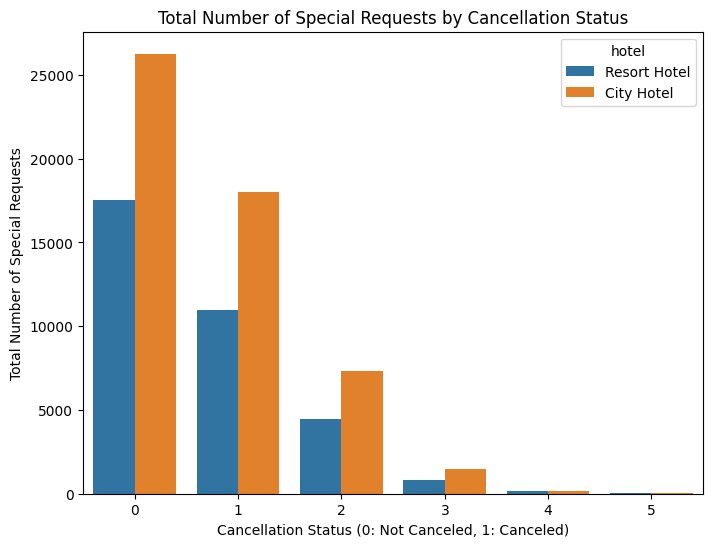

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to compare the average number of special requests for each cancellation status
plt.figure(figsize=(8, 6))
sns.countplot(x=	"total_of_special_requests",data=data,hue="hotel")
plt.xlabel('Cancellation Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Total Number of Special Requests')
plt.title('Total Number of Special Requests by Cancellation Status')
plt.show()


**Insights**
- City Hotels generally exhibit higher counts for all categories of special requests compared to Resort Hotels. Additionally, the majority of guests, whether in City or Resort Hotels, tend to make only one special request.

## Question-3 : How does the ADR vary with the length of stay for both City Hotels and Resort Hotels?

#### Multivariate

Values beyond 13 for the 'total_stay' may be rare and might not contribute significantly to the overall patterns or trends. Ignoring these extreme values simplifies interpretation.

<Axes: xlabel='total_stay', ylabel='adr'>

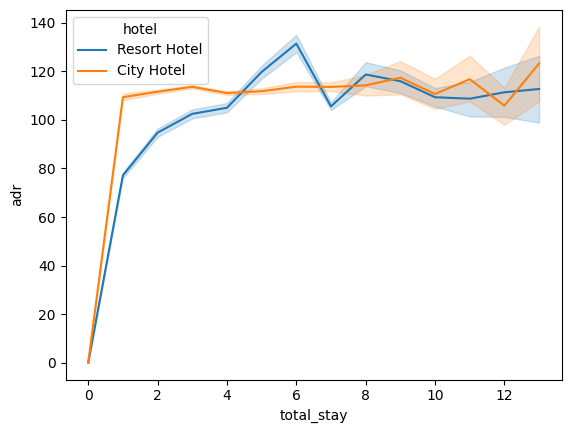

In [ ]:
sns.lineplot(y=data["adr"],x=data[data["total_stay"]<14]["total_stay"],hue=data.hotel)

**Insights**
- After the initial two days of stay, the average daily rate (ADR) for both City Hotels and Resort Hotels tends to stabilize within the range of 100 to 130. Notably, planning a stay of 6-7 days at a Resort Hotel offers the opportunity to secure the minimum ADR. In contrast, the ADR for City Hotels remains relatively constant across different lengths of stay. However, for stays exceeding 14 days, there is a visible decline in the average daily rate, suggesting a potential decrease in pricing for longer durations."

## Question-4 : Which customer type contributes the most to the total bookings in each hotel?

#### Multivariate


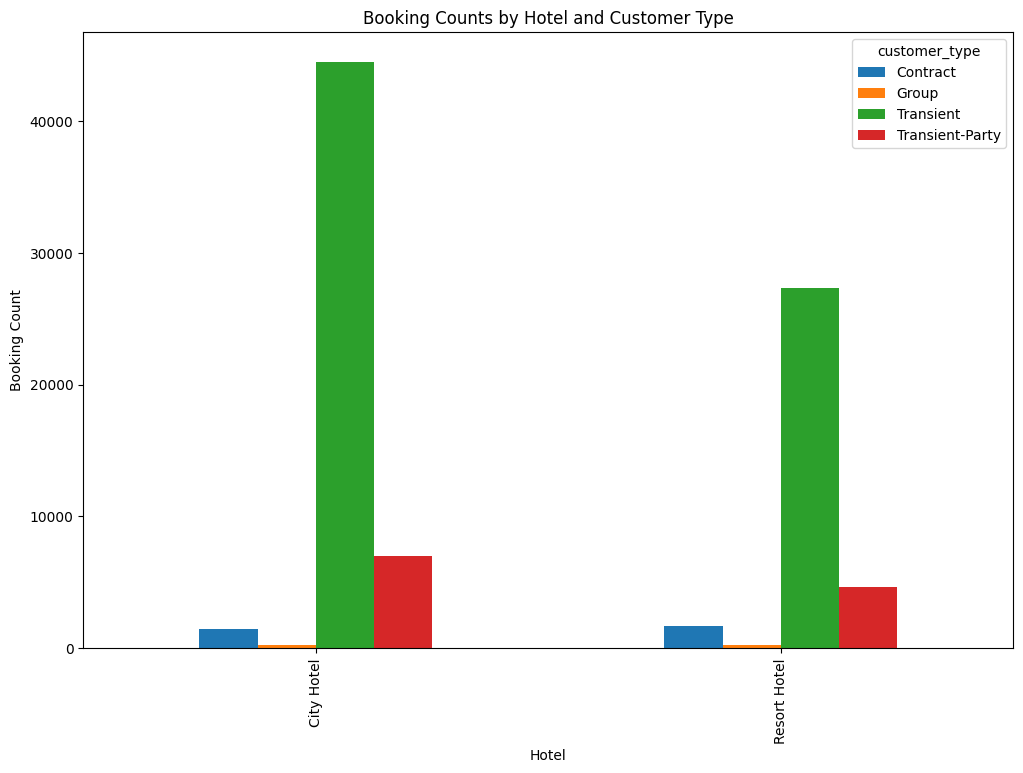

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame

# Comparing booking counts by hotel and customer type
booking_counts = data.groupby(['hotel', 'customer_type']).size().unstack()
booking_counts.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Hotel')
plt.ylabel('Booking Count')
plt.title('Booking Counts by Hotel and Customer Type')
plt.show()


**Insights**
 - As revealed by the graph, transient category of customers contributes the most in each type of hotel.

## Question- 5: Which customer type exhibits the highest cancellation rates in each hotel?

#### Multivariate

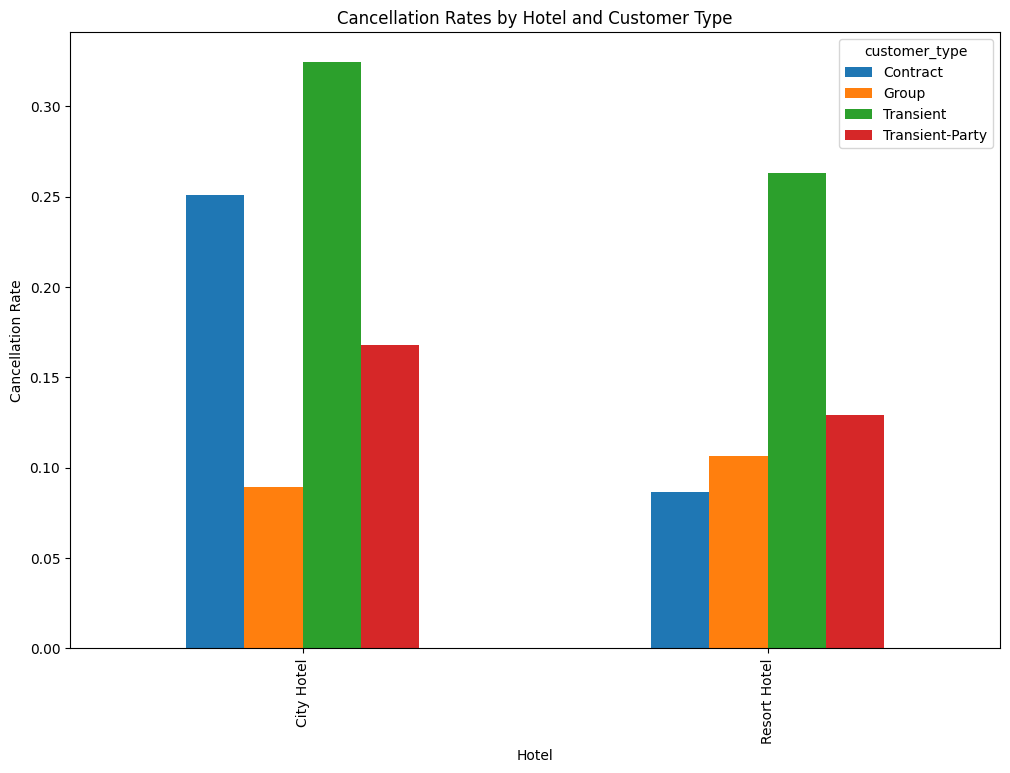

In [ ]:
# Comparing cancellation rates by hotel and customer type
cancellation_rates = data.groupby(['hotel', 'customer_type'])['is_canceled'].mean().unstack()
cancellation_rates.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Hotel')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rates by Hotel and Customer Type')
plt.show()

**Insights**
 - In both types of hotels cancellation rates are highest by transient category.

## Question-6 : Which customer type tends to have the longest average stay duration in each hotel?

#### Mutlivariate

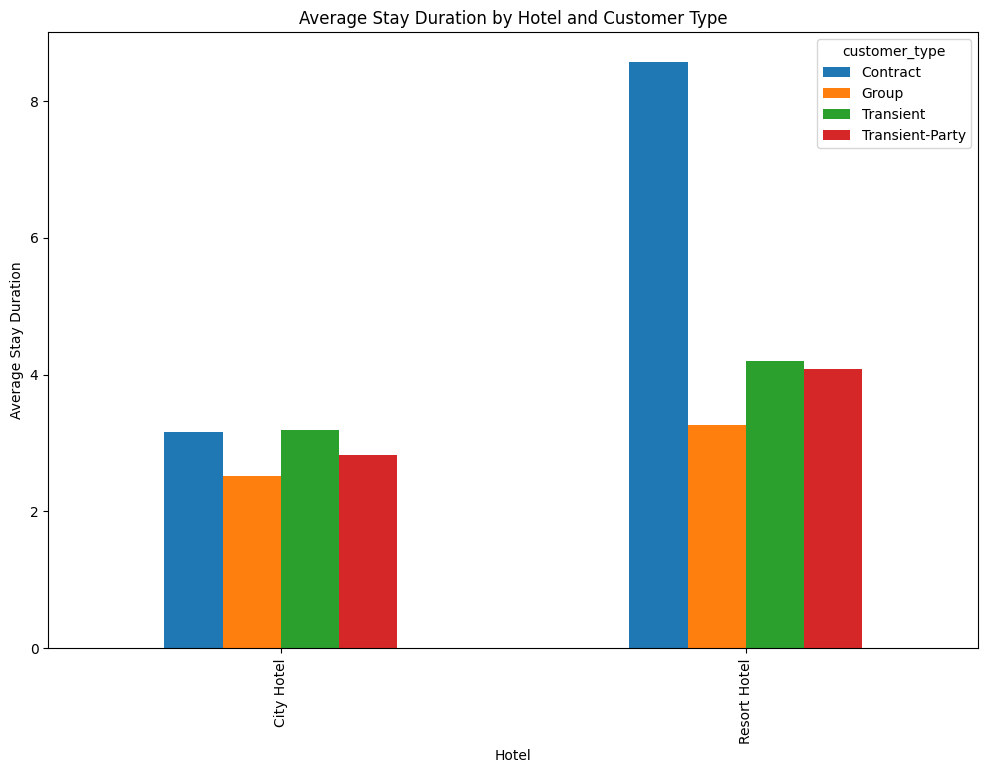

In [ ]:
# Comparing average stay duration by hotel and customer type
stay_duration = data.groupby(['hotel', 'customer_type'])["total_stay"].mean().unstack()
stay_duration.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Hotel')
plt.ylabel('Average Stay Duration')
plt.title('Average Stay Duration by Hotel and Customer Type')
plt.show()

**Insights**
- In city hotel, stay duration for each type of customers is approximately the same but in resort hotel the category contract dominates over the other categories.

## Question-7 : Are there more single-guest reservations, or do guests often travel in groups for both types of hotels?

#### Multivariate


<Axes: xlabel='total_guests', ylabel='count'>

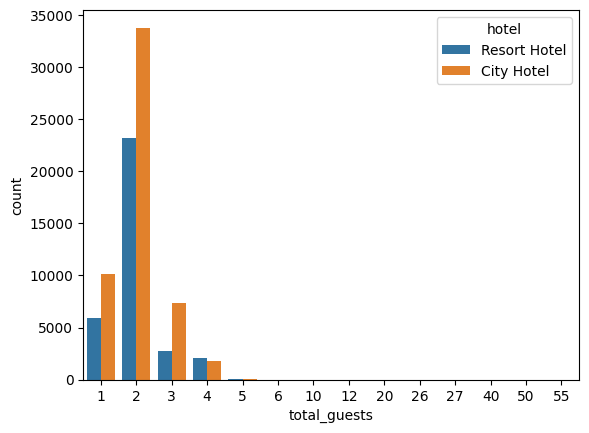

In [ ]:
sns.countplot(x=data["total_guests"],hue=data["hotel"])

**Insights**

As we can see that most people prefer to travel as a group of 2 in both types of hotels.

## Question-8 : Are there specific months where both types of hotels experience a noticeable increase or decrease in ADR?

#### Multivariate

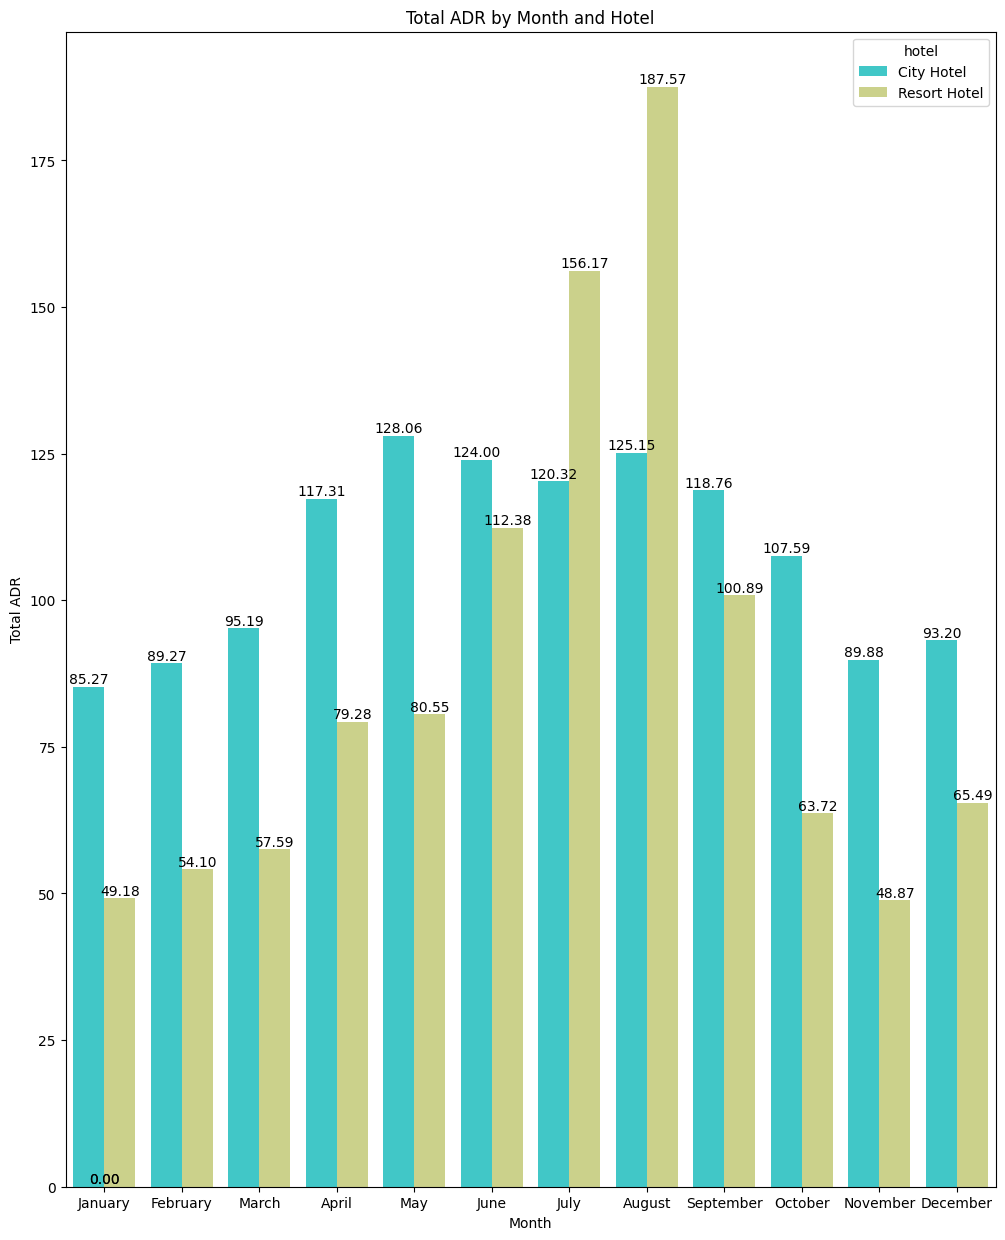

In [ ]:
plt.figure(figsize=(12,15))
adr_months=data.groupby(["hotel","arrival_month"])[["adr"]].mean()
ax=sns.barplot(x="arrival_month", y='adr', data=adr_months, order=months_list,hue="hotel",palette="rainbow")
for p in ax.patches:
  plt.text(p.get_x()+p.get_width()/2,p.get_height(),f"{p.get_height():0.2f}",ha="center", va="bottom")
# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total ADR')
plt.title('Total ADR by Month and Hotel')
plt.show()

**Insights**
- The analysis highlights that August records the highest Average Daily Rate (ADR) for Resort Hotels, whereas May sees the highest ADR in City Hotels. Conversely, November exhibits the lowest ADR for Resort Hotels, and January marks the lowest ADR for City Hotels. These findings provide valuable insights into the seasonal variations in hotel pricing for different months and hotel types.

## Question-9 : Which month experiences the highest cancellation rate?"

#### Multivariate

<Figure size 2000x4000 with 0 Axes>

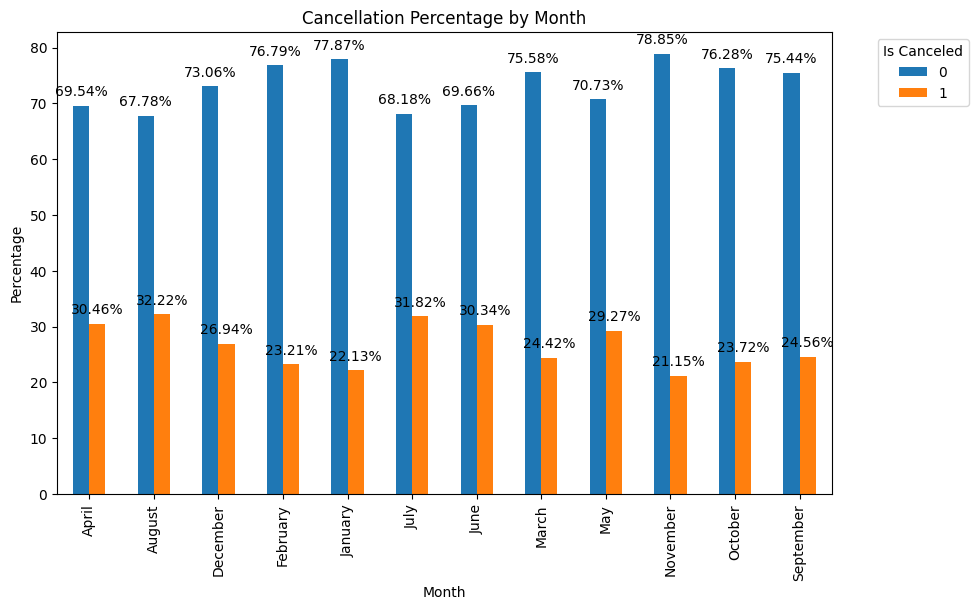

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
result_percentage = pd.crosstab(data['is_canceled'], data['arrival_month'], normalize='columns') * 100

# Plotting the stacked bar plot
ax = result_percentage.T.plot.bar(stacked=False, figsize=(10, 6))
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
ax.set_title('Cancellation Percentage by Month')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.legend(title='Is Canceled', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



**Insights**
- As we can see that the cancellation rate is highest in August followed by Jylu and the least in the month of November.

## Question-10 : How does the number of bookings vary between different hotels over the years?
#### Multivariate

<Figure size 1200x800 with 0 Axes>

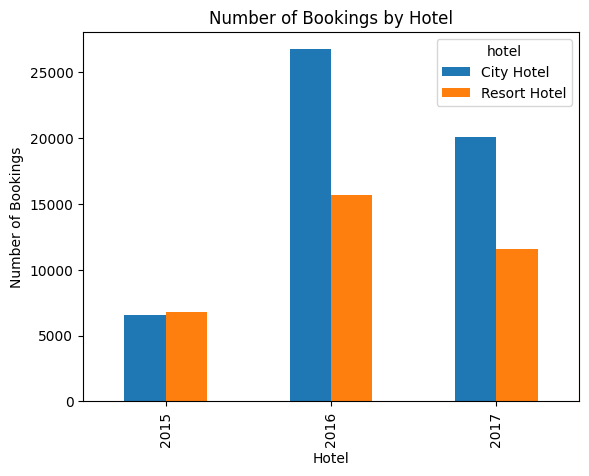

In [ ]:
# Data Preparation
hotel_booking_counts = data.groupby(['arrival_date_year'])["hotel"].value_counts().unstack()

# Visualization
plt.figure(figsize=(12, 8))
hotel_booking_counts.plot(kind="bar")
plt.xlabel('Hotel')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Hotel')
plt.show()

**Insights**
- In 2015, both types of hotels are equally popular while in 2016 and 2017 City Hotels had become more than popular than Resort Hotel.

## **5. Solution to Business Objective**

To optimize hotel services, enhance customer experiences, and boost industry revenue, the following strategic insights are proposed.
- **Geographic Targeting**: Given that the majority of guests come from Western Europe, hotels can allocate a significant portion of their marketing budget to target and attract guests from these countries.

- **Busiest Hotel Type**: With 61% of bookings for City hotels and 39% for Resort hotels, focusing more resources on City hotels is essential due to their higher occupancy.
- **Last-Minute Specials**: The right-skewed distribution of lead_time indicates a trend of last-minute bookings. Hotels can leverage this insight to offer targeted last-minute specials or promotions to attract spontaneous travelers.
-**Streamline Booking Channels**: Given that the majority of bookings come through TA/TO, hotels can optimize their online presence and partnerships with these channels to maximize reservations.
-**Enhance Customer Experience**: With most guests not making special requests or making only one, hotels can streamline and enhance their customer service by focusing on common and simple requests.
-**Monitor Changes and Cancellations**: Hotels can closely monitor bookings with more than four changes and no deposit, as they are associated with a 20% cancellation likelihood.
-**Package Deals for Groups**: With a significant number of bookings being for City hotels and the prevalence of transient bookings, hotels can introduce special package deals or discounts for group reservations, targeting transient party booking
- **Enhanced Online Presence** : Strengthen the online presence, particularly on online travel agencies (OTAs), since the distribution channel "TA/TO" represents 80% of the bookings.
- **Peak Season Promotions** : Implement promotions and special offers during peak months between May to August to capitalize on the increased demand during the summer period
- **Special Promotions**: Introducing special promotions, discounts, or packages during the less busy months can encourage bookings and fill rooms during periods of lower demand.
- **Personalized Offers**: Provide personalized offers and promotions to repeated guests based on their past preferences, ensuring they feel valued and appreciated.
- **Resource Allocation**:Stakeholders can optimize housekeeping and maintenance resources by focusing on preparing Room Type A more frequently, given its high probability of assignment.